## 제10장

### 1. 균등분포의 난수 생성

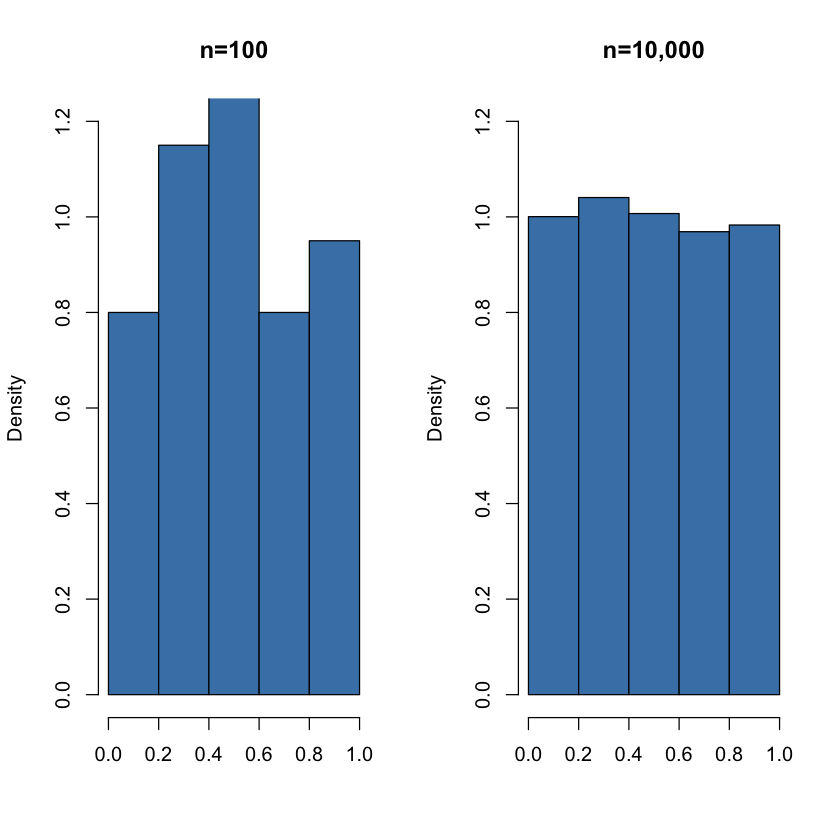

In [1]:
par(mfrow=c(1,2))
set.seed(1234567)
hist(runif(100), xlab="", main="n=100", freq =FALSE, ylim=c(0, 1.2), 
  breaks = c(0,0.2,0.4,0.6,0.8,1.0), col="steelblue")
hist(runif(10000), xlab="", main="n=10,000", freq =FALSE, ylim=c(0, 
  1.2), breaks = c(0,0.2,0.4,0.6,0.8,1.0), col="steelblue")

### 2. 지수분포 난수의 생성과 비교

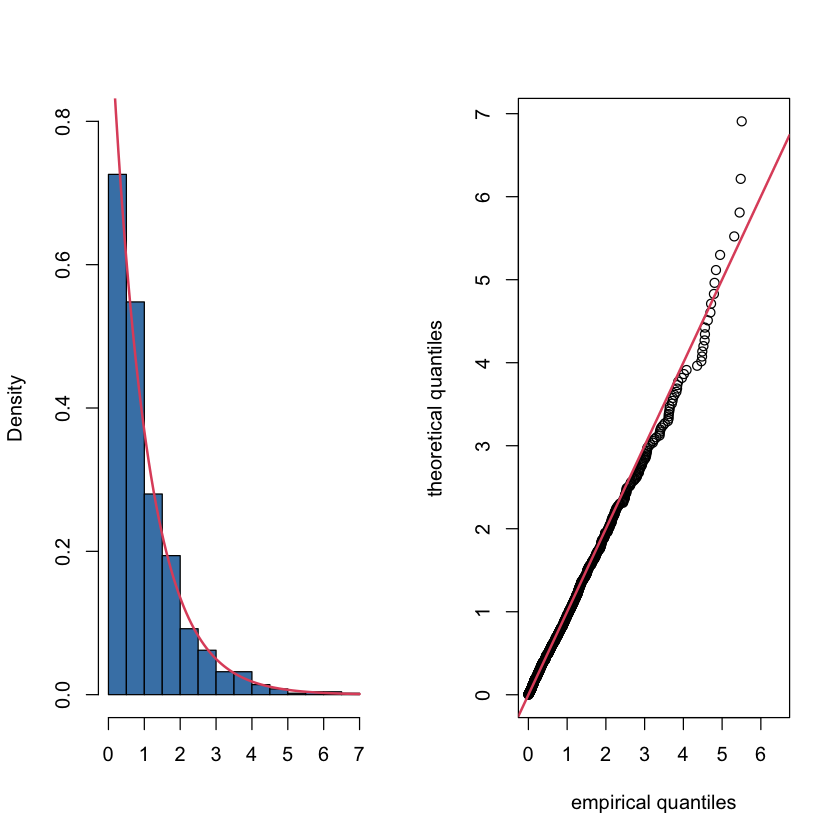

In [2]:
par(mfrow=c(1,2))
set.seed(1234567)
u1 = runif(1000)
e1 = -log(1-u1)
x1 = rexp(1000,1)
sq1 = sort(x1)
tq1 = function(u){-log(1-u)}
hist(e1, freq=FALSE, ylim=c(0, 0.8), xlab="", main="", col="steelblue")
 curve(dexp(x,1), xlim = c(0, 7), add=TRUE, col=2, lwd=2)
plot(sq1, tq1(1:1000/1000), ylab="theoretical quantiles", xlab="empirical quantiles")
 abline(a=0, b=1, col=2, lwd=2)

### 3. 카이제곱분포 난수의 생성과 비교

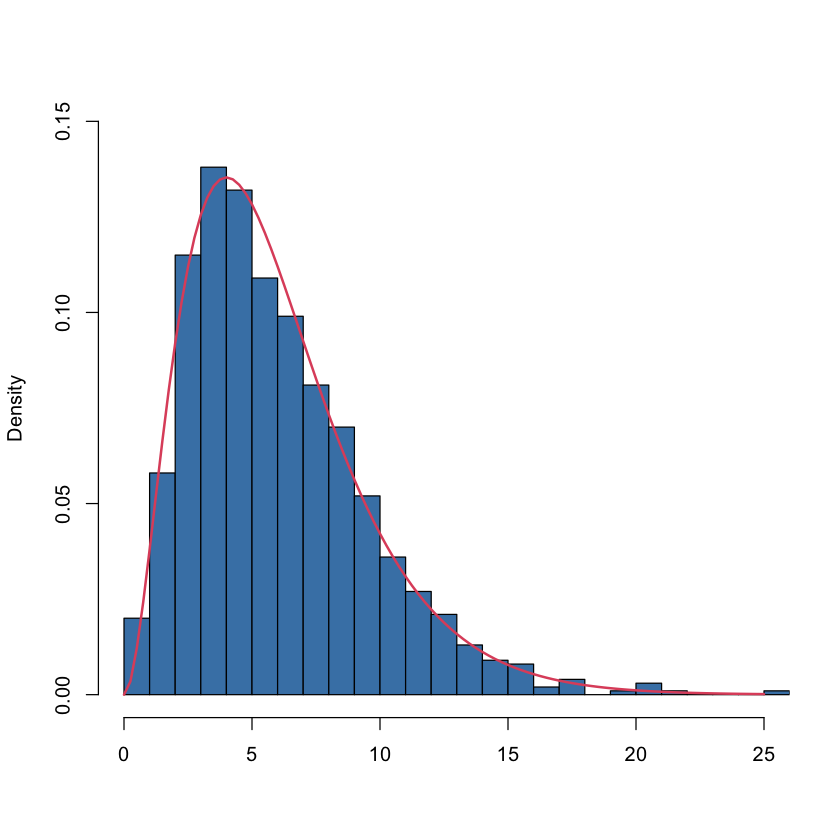

In [3]:
set.seed(1234567)
u1 = runif(3*1000)
u2 = matrix(data=u1,nrow=3) 
x1 = -log(1-u2)               # 지수분포 생성
x1 = 2*apply(x1,2,sum)        # 카이제곱분포
hist(x1, freq=FALSE, xlim=c(0,25), ylim=c(0,0.15), xlab="", main="", col="steelblue", breaks=20)
 curve(dchisq(x, df=6), add=TRUE, col=2, lwd=2)

### 4. 정규분포 난수의 생성과 비교

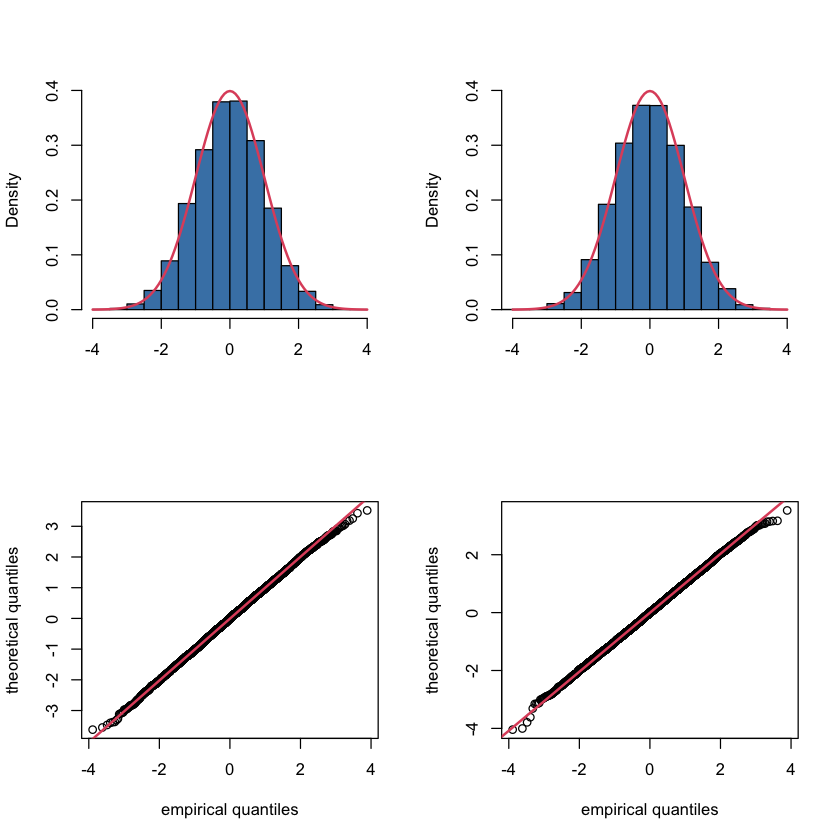

In [4]:
par(mfrow=c(2,2))
set.seed(1234567)
u1 = runif(10000)
u2 = runif(10000)
x1 = sqrt(-2*log(u1))*cos(2*pi*u2)
x2 = sqrt(-2*log(u1))*sin(2*pi*u2)

hist(x1, freq=FALSE, xlim=c(-4,4), breaks=20,ylim=c(0,0.4), xlab="",  main="", col="steelblue")
 curve(dnorm(x), add=TRUE, col=2, lwd=2)
hist(x2, freq=FALSE, xlim=c(-4,4), breaks=20,ylim=c(0,0.4), xlab="", main="", col="steelblue")
 curve(dnorm(x), add=TRUE, col=2, lwd=2)
qqnorm(x1, ylab="theoretical quantiles", xlab="empirical quantiles", main="" )
 qqline(x1, col=2, lwd=2 )
qqnorm(x2, ylab="theoretical quantiles", xlab="empirical quantiles", main="" )
 qqline(x2, col=2, lwd=2 )

### 5. 이항분포 난수의 생성

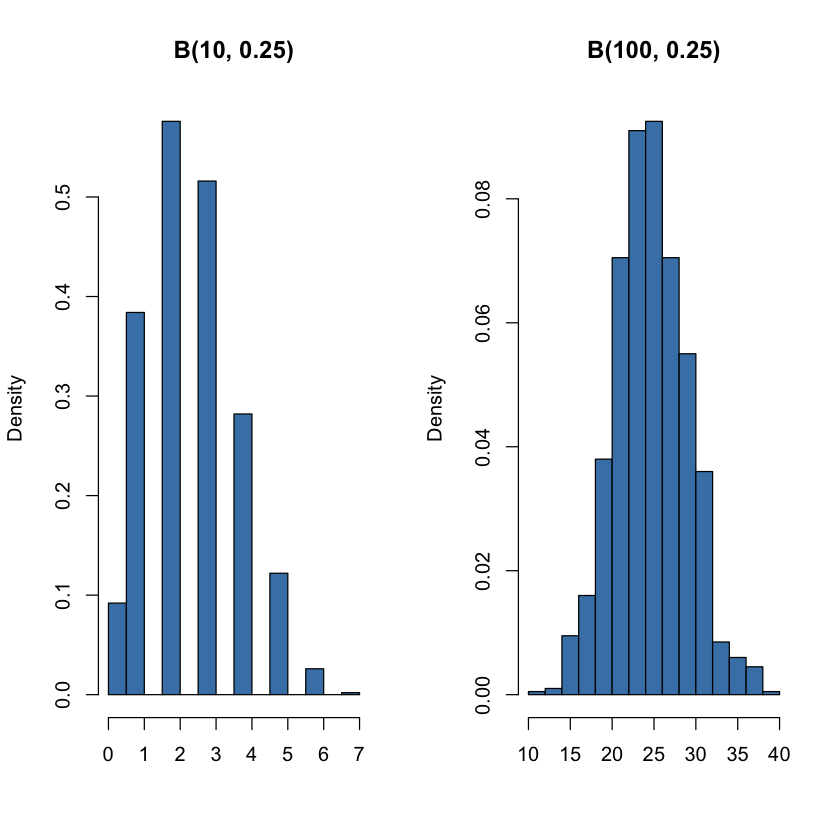

In [5]:
par(mfrow=c(1,2))
set.seed(1234567) 

# 이항분포 B(10, 0.25) 생성
bn1 = rep(0,1000)
for(i in 1:1000) {bn1[i] = sum(runif(10)<0.25)}
hist(bn1, freq=FALSE, xlab="", main="B(10, 0.25)", col="steelblue")

# 이항분포 B(100, 0.25) 생성
bn2 = rep(0,1000)
for(i in 1:1000) {bn2[i] = sum(runif(100)<0.25)}
hist(bn2, freq=FALSE, xlab="", main="B(100, 0.25)", col="steelblue")

### 6. 원주율 계산

In [6]:
set.seed(1234567) 
pical = function(n){
     u1 = runif(n, -10, 10)
     u2 = runif(n, -10, 10)
     x1 = rep(0,n)
     x1[u1^2 + u2^2 <= 100] = 1
     pi1 = mean(x1)*4
     return(pi1)
}
pical(100)  
pical(10000)  
pical(1000000)  

[1] 3.28

[1] 3.1668

[1] 3.139024

### 7. 함수 면적의 계산

0.25 with absolute error < 2.8e-15

[1] 0.28

[1] 0.249

0.3333334 with absolute error < 0.00012

[1] 0.32

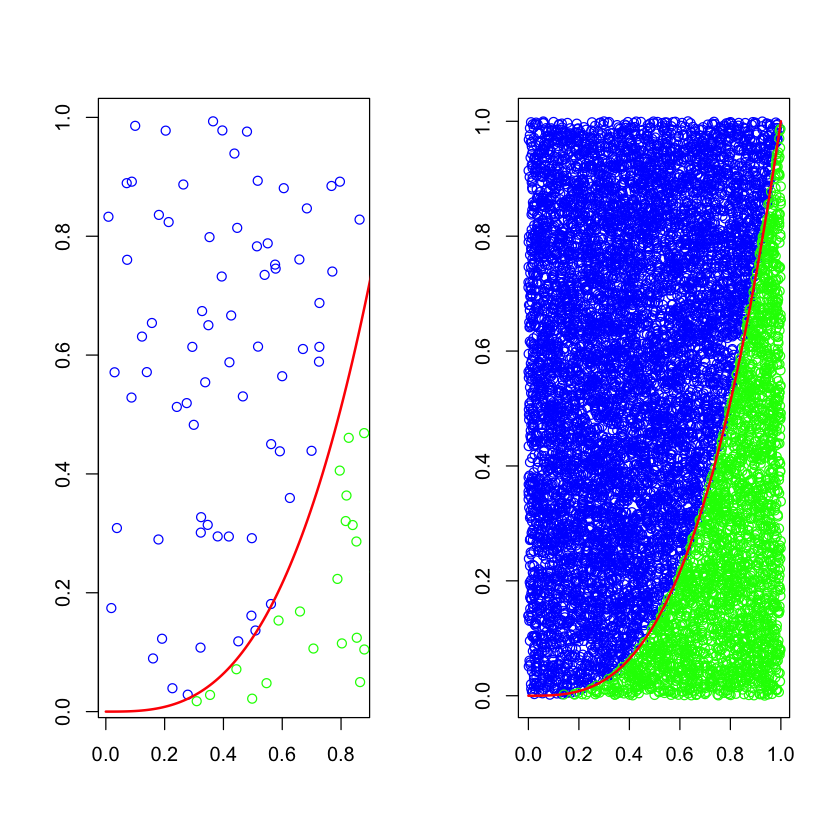

[1] 0.335

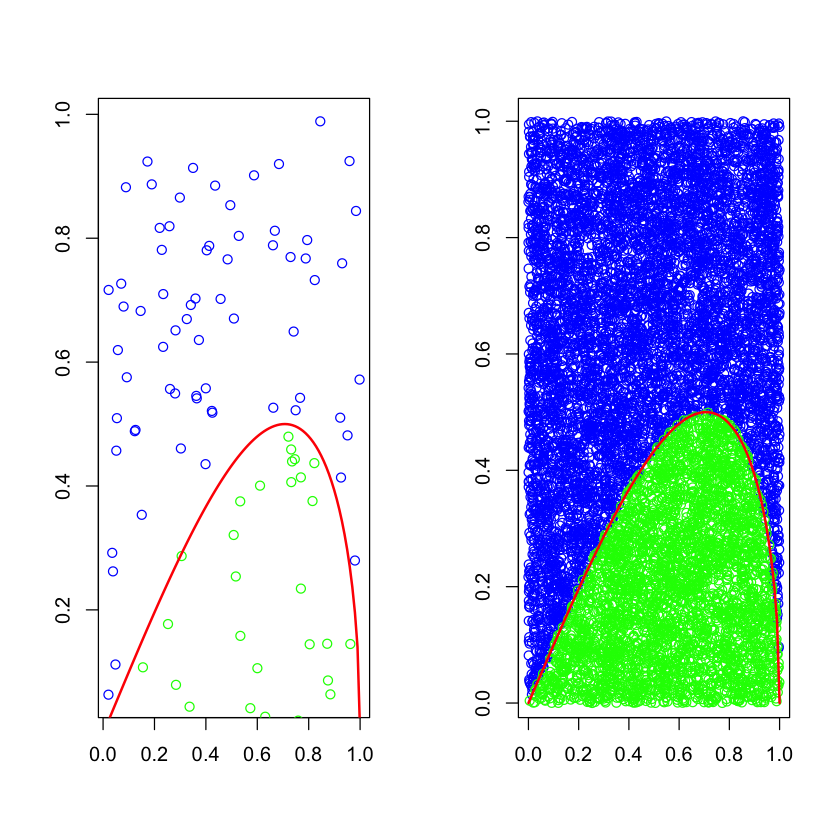

In [7]:
par(mfrow=c(1,2))
set.seed(1234567) 
 
rint = function(f,gg,n){
     sam = matrix(runif(2*n), ncol=2)
     qq = gg(sam[,1], sam[,2])
     
     plot(sam[!qq,1], sam[!qq,2], col='blue', pch=1, xlab="", ylab="")
     points(sam[qq,1], sam[qq,2], col='green', pch=1)
     curve(f, 0,1, n=100, col='red', add=TRUE, lwd=2)
     return(length(qq[qq]) / n)
 }
 
f1 = function(x) x^3
g1 = function(x,y) y <= x^3
 
f2 = function(x) sqrt(1-x^2)*x
g2 = function(x,y) y <= sqrt(1-x^2)*x
 
integrate(f1,0,1)
rint(f1, g1, 100)
rint(f1, g1, 10000)
integrate(f2,0,1)
rint(f2, g2, 100)
rint(f2, g2, 10000)

### 8. 정규분포의 기댓값과 분산의 계산

In [8]:
set.seed(1234567) 
x1 = rnorm(100)
x2 = rnorm(10000)
 
f1 = function(x) x*dnorm(x)
mu = integrate(f1, -Inf, Inf)
print(mu)

mean(x1)
mean(x2)
 
f2 = function(x) (x-mu$value)^2*dnorm(x)
sigma2 = integrate(f2, -Inf, Inf)
print(sigma2)
var(x1)
var(x2)

0 with absolute error < 0


[1] -0.0771234

[1] -0.009002444

1 with absolute error < 1.2e-07


[1] 0.9188922

[1] 0.9895978

### 9. 정규분포의 분산의 계산

In [9]:
set.seed(1234567) 
imports = function(n){
     x1 = rt(n,1)
     w1  = dnorm(x1)/dt(x1,1)
     return(mean(x1*x1*w1))
 }
 
imports(100)  
imports(10000)  

[1] 1.07454

[1] 0.9907632